# After several iterations/changes did not perform better than random forest model

In [591]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

In [592]:
roman = pd.read_csv('./model_data_2.csv', index_col=0)
roman = roman.drop(list(roman.loc[(roman['current_price'] < 3)| 
                          (roman['current_price']> 1000)].index), axis=0).reset_index(drop=True)

roman = roman.drop('charityId', axis=1)
roman = roman.drop(['URLTitle', 'itemId'], axis=1)

In [593]:
y = np.log(roman['current_price'].values)
X = roman.drop('current_price', axis=1)

X = roman.drop(['completed_no_time_left', 'less_than_hour_left', 'less_than_week_left', 'aemilian', 'antoninus pius',
'aurelian', 'balbinus', 'carinus', 'carus', 'claudius', 'constans i', 'decius', 'galba',
'gallienus', 'gordian i', 'jovian', 'leo i', 'licinius', 'numerian', 'tacitus', 'theodosius i',
'valerian', 'current_price', 'less_than_2day_left'], axis=1)

X['bidCountsq'] = X['bidCount'].values **2
X['bidCountcubed'] = X['bidCount'].values ** 3
X['interbidwatch'] = X['bidCount'] * X['watchCount']

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [595]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [596]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [597]:
X_train.shape

(12755, 75)

In [605]:
tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32,
                  shape=(None, X_train.shape[1]),
                  name='X')

y = tf.placeholder(dtype=tf.float32,
                  shape=(None),
                  name='y')

In [606]:
n_hidden = 75
hidden1 = tf.layers.dense(X, units= n_hidden, 
               name='hidden1',
               activation=tf.nn.relu)


#for output you want None with regression with 1 output
y_hat = tf.layers.dense(hidden1, units=1, 
                       activation=None,
                       name='y_hat')

In [607]:
loss = tf.losses.mean_squared_error(y, y_hat)

learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [608]:
init = tf.global_variables_initializer()

train_err = []
test_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(350):
        sess.run(training_op,
                 feed_dict={X:X_train,y:y_train})
        
        train_loss = sess.run(loss,
                             feed_dict={X:X_train,y:y_train})
        
        test_loss = sess.run(loss,
                             feed_dict={X:X_test,y:y_test})
        
        test_err.append(test_loss)
        train_err.append(train_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

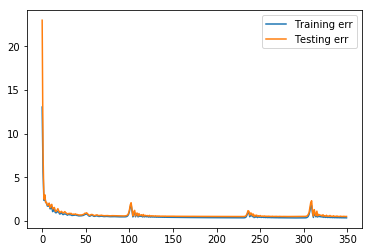

In [609]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(train_err, label='Training err')
plt.plot(test_err, label='Testing err')
plt.legend()

In [610]:
from sklearn import metrics

metrics.r2_score(y_test, pred)

0.67135850981366507

In [ ]:
#After various variations/layers/structures, not performing better than Random Forest